## Context
This dataset is a supermarket chain in myanmar sourced from Kaggle. It includes 17 variables, as seen in the attribute info of the dataset below.

## Data source
https://www.kaggle.com/aungpyaeap/supermarket-sales/code

## Attribute Info

|Column Name|Description|
|:-----|:-----------|
|Invoice id |Computer generated sales slip invoice identification number 
|Branch|Branch of supercenter (3 branches are available identified by A, B and C)
|City|Location of supercenters
|Customer type|Type of customers, recorded by Members for customers using member card and Normal for without member card.
|Gender|Gender type of customer
|Product line|General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
|Unit price|Price of each product in $
|Quantity|Number of products purchased by customer
|Tax|5% tax fee for customer buying
|Total|Total price including tax
|Date|Date of purchase (Record available from January 2019 to March 2019)
|Time|Purchase time (10am to 9pm)
|Payment|Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
|COGS|Cost of goods sold
|Gross margin percentage|Gross margin percentage
|Gross income|Gross income
|Rating|Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## Task Performed

|S.no|Task|
|:----|:-----------|
|1|Overall weekly sales
|2|Weekly sales per branch
|3|Product line sales distribution
|4|Visit distribution in each branch
|5|Product line sales distribution on branch level
|6|Product line distribution of all branches per visit
|7|Product line weekly sales comparison
|8|Visit spend per transaction, unit per transaction, spend per unit
|9|Weekly sales of product line per branch
|10|Spend per transaction, unit per transation and spend per unit on branch level
|11|Visit,sales and quantity per product line
|12|In which part of day visits are most
|13|Part of day visit per week
|14|Sales comparison between weekdays and weekends
|15|Sales comparison between weekdays and weekends on branch level
|16|Weekly gross income
|17|Benefit to become a member
|18|Shopping experience

In [1]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('C:\\Users\\piyush bhardwaj\\Downloads\\supermarket_sales.csv')
data['Invoice ID'] = data['Invoice ID'].str.replace('-','')
data['Date'] = pd.to_datetime(data['Date'])
data['date only'] = data['Date'].dt.day
data['day'] = data['Date'].dt.day_name()
data['month'] = data['Date'].dt.month
data['week'] = data.Date.dt.weekofyear
data.rename(columns={'Total':'sales $'},inplace=True)

In [5]:
def time(x):
    if x['Time'] <= '11:59':
        return 'Morning'
    elif '12:00' <= x['Time'] <= '16:59':
        return 'Afternoon'
    elif '17:00' <= x['Time'] <= '21:00':
        return 'Evening'

In [6]:
data['Parts of day'] = data.apply(time,axis=1)
data.head(2)

Invoice ID Branch       City Customer type  Gender            Product line  \
0  750678428      A     Yangon        Member  Female       Health and beauty   
1  226313081      C  Naypyitaw        Normal  Female  Electronic accessories   

   Unit price  Quantity   Tax 5%   sales $  ...  Payment    cogs  \
0       74.69         7  26.1415  548.9715  ...  Ewallet  522.83   
1       15.28         5   3.8200   80.2200  ...     Cash   76.40   

  gross margin percentage  gross income  Rating  date only       day  month  \
0                4.761905       26.1415     9.1          5  Saturday      1   
1                4.761905        3.8200     9.6          8    Friday      3   

  week  Parts of day  
0    1     Afternoon  
1   10       Morning  

[2 rows x 22 columns]

In [7]:
print(data.shape)
print(data['Invoice ID'].nunique())
print(data.isnull().sum())
print(data.dtypes)

(1000, 22)
1000
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
sales $                    0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
date only                  0
day                        0
month                      0
week                       0
Parts of day               0
dtype: int64
Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int

In [6]:
data['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

## Overall weekly sales

Given: 3 months data from jan to march 2019.

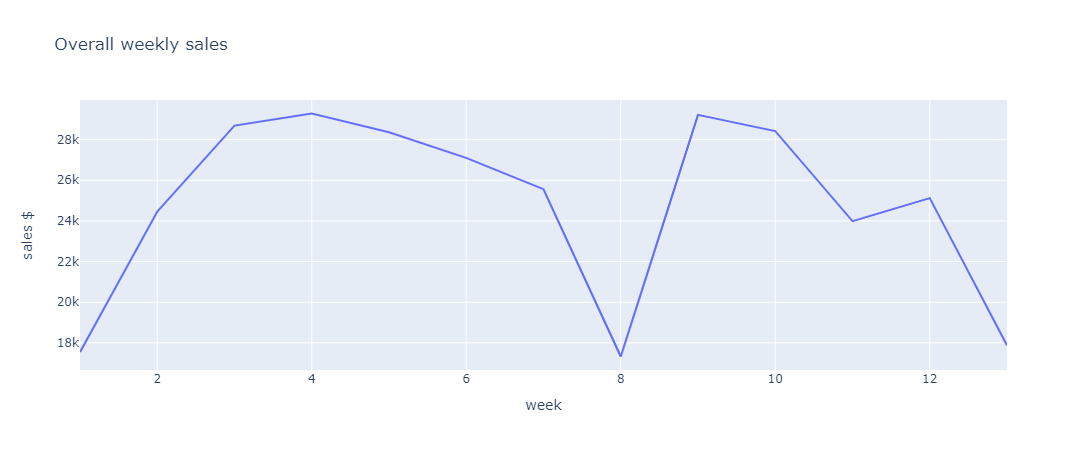

In [7]:
overall_sales = data.filter(['sales $','week'])
overall_sales = overall_sales.groupby(['week']).agg({'sales $':'sum'})
overall_sales.reset_index(level=[0],inplace=True)
fig = px.line(overall_sales, x="week", y="sales $",title='Overall weekly sales')
fig.show()

### Observation
- X axis represent thirteen weeks.
- Y axis represent sales in dollars.
- Week 1 and 13 have few days.
- Gradual fall from week 4 to week 7.
- Sudden fall in week 8.

## Weekly sales per branch

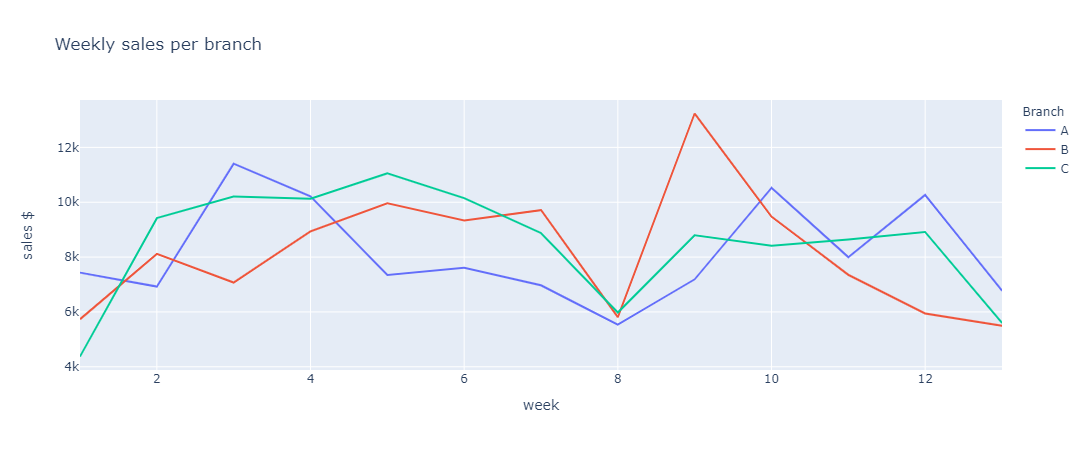

In [8]:
branch = data.filter(['Invoice ID','Branch','Product line','sales $','day','month','week'])
branch = pd.DataFrame(branch.groupby(['Branch','week']).agg({'sales $':'sum','Invoice ID':'count'}))
branch.reset_index(level=[0,1],inplace=True)
fig = px.line(branch, x="week", y="sales $", color='Branch',title='Weekly sales per branch')
fig.show()

### Observation
- X axis represent weeks 1 to 13.
- Y axis represent sales in dollars.
- In branch-A sales gradualy fall from week 3 to week 8. Rising after week 8. Fluctuation from week 10 to 12
- In branch-B sales stable from week 4 to week 7. Sudden fall in week 8 and start decreasing from week 9 till the end.
- In branch-C sales decreasing from week 5 to week 8. No change from week 9 to week 12.

## Product line sales distribution

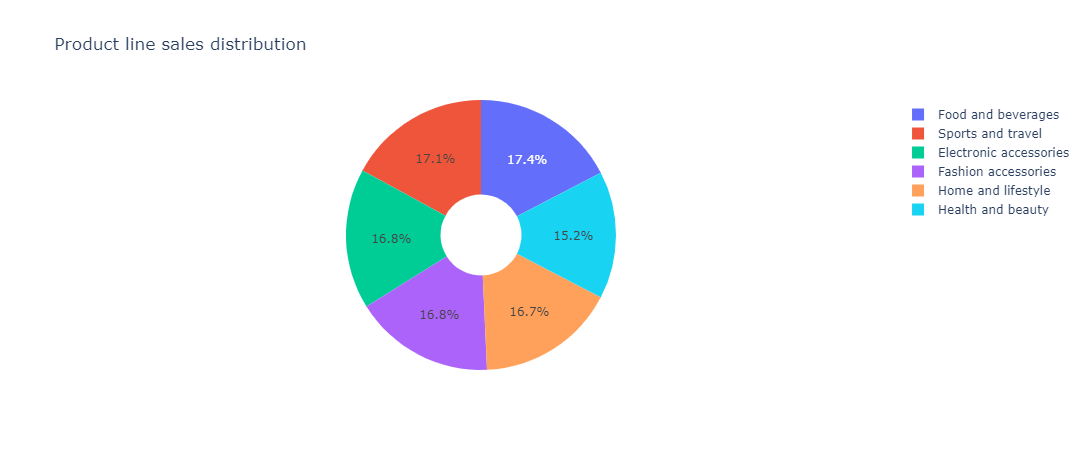

In [9]:
sales_bar = data.filter(['Invoice ID','Product line','sales $',])
sales_bar = sales_bar.groupby(['Product line']).agg({'sales $':'sum'})
sales_bar.reset_index(level=[0],inplace=True)
# fig = px.bar(x=sales_bar['Product line'], y=sales_bar['sales $'],title='Product line sales distribution' ,labels={'x': 'Product line', 'y': 'sales $'})
# fig.show()
fig = go.Figure(data=[go.Pie(labels=sales_bar['Product line'], values=sales_bar['sales $'],hole=.3)])
fig.update_layout(title_text="Product line sales distribution")
fig.show()

### Observation
- Food and beverages shows the maximum sales followed by sports and travel.
- Health and beauty have the lowest contribution.
- Electronics and fashion accessories have same percentage of sales.
- Remaining products falls in 49k to 53k range. 

## Visit distribution in each branch

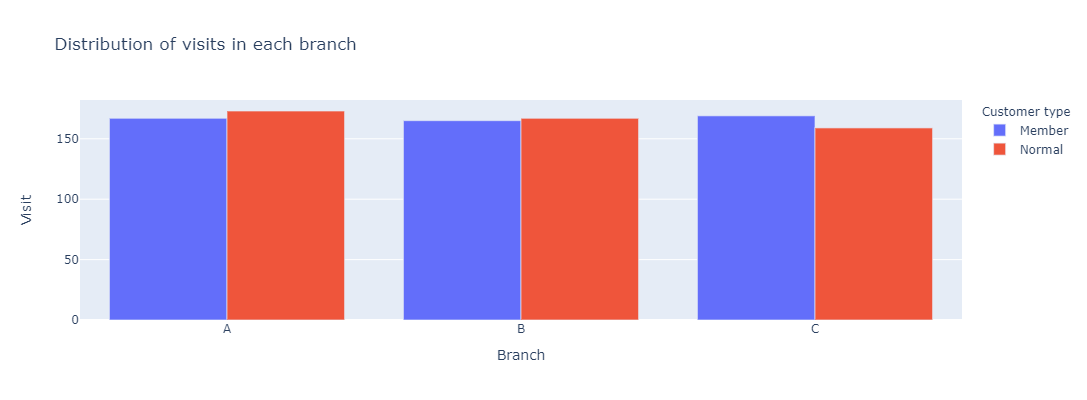

In [10]:
customers = data.filter(['Invoice ID','Branch','Customer type','Gender'])
customers = pd.DataFrame(customers.groupby(['Branch','Customer type']).agg({'Invoice ID':'count'}))
customers.reset_index(level=[0,1],inplace=True)
customers.rename(columns={'Invoice ID':'Visit'},inplace=True)
fig = px.bar(customers, x="Branch", y='Visit',color="Customer type",title="Distribution of visits in each branch",
             barmode='group',width = 900,height=400
            )
fig.show()

### Observation
- X axis represent Branch of stores.
- Y axis represent visits of customers.
- Legend represent members and non-members.
- In branch-A total visits in 3 months are 340 in which 167 are members and 173 are non-members.
- In branch-B total visits in 3 months are 332 in which 165 are members and 167 are non-members.
- In branch-C tottal visits are 328 in which 169 are members and 159 are non-members.
- Branch-C have less visits as compare to other branches but have highest number of members.

## Product line sales distribution on branch level

In [11]:
def branch(branch_sales):
    branch_sales = branch_sales.filter(['Invoice ID','Product line','sales $','Branch'])
    branch_sales = branch_sales.groupby(['Product line','Branch']).agg({'sales $':'sum'})
    branch_sales.reset_index(level=[0,1],inplace=True)
    return branch_sales

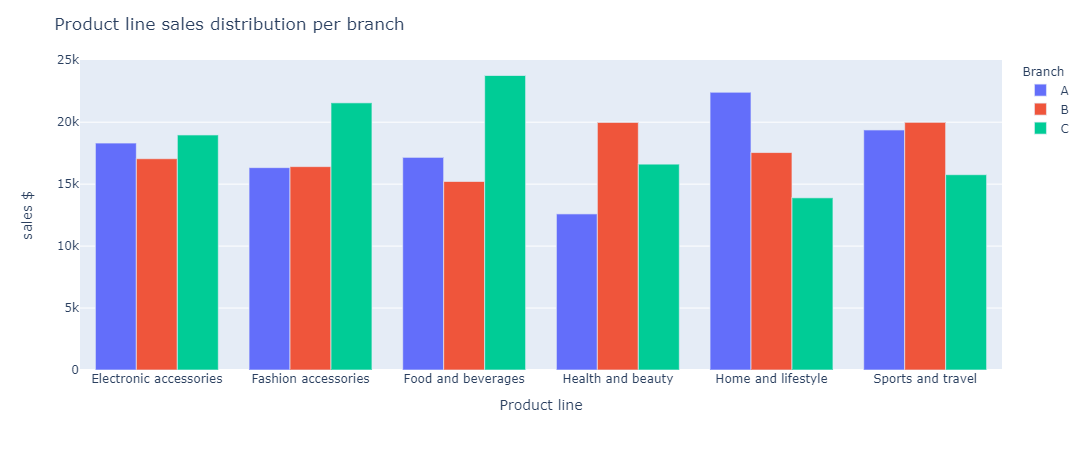

In [12]:
sales_A = branch(data)
# sales_A = sales_A[sales_A.Branch == 'A']
# fig = px.bar(x=sales_A['Product line'], y=sales_A['sales $'],title='Sales distribution of branch A' ,labels={'x': 'Product line', 'y': 'sales $'})
# fig.show()
# fig = px.pie(sales_A, values='sales $', names='Product line',,title='Sales distribution of branch A',
#              color_discrete_sequence=px.colors.sequential.RdBu)
# fig.show()
fig = px.bar(x=sales_A['Product line'], y=sales_A['sales $'], color=sales_A['Branch'], barmode='group',
             labels={'x': 'Product line', 'y': 'sales $'})
fig.update_layout(title_text="Product line sales distribution per branch",legend_title="Branch")
fig.show()

### Obsevation
- X axis represent product line.
- Y axis represent sales in dollars.
- Legend represent branches with different color.
- In branch-A home and lifestyle have maximum sales followed by sports and travel.
- In branch-B health and beauty have maximum sales followed by sports and travel.
- In branch-C food and beverages have maximum sales followed by fashion and accessories.

## Product line distribution of all branches per basket/visit.

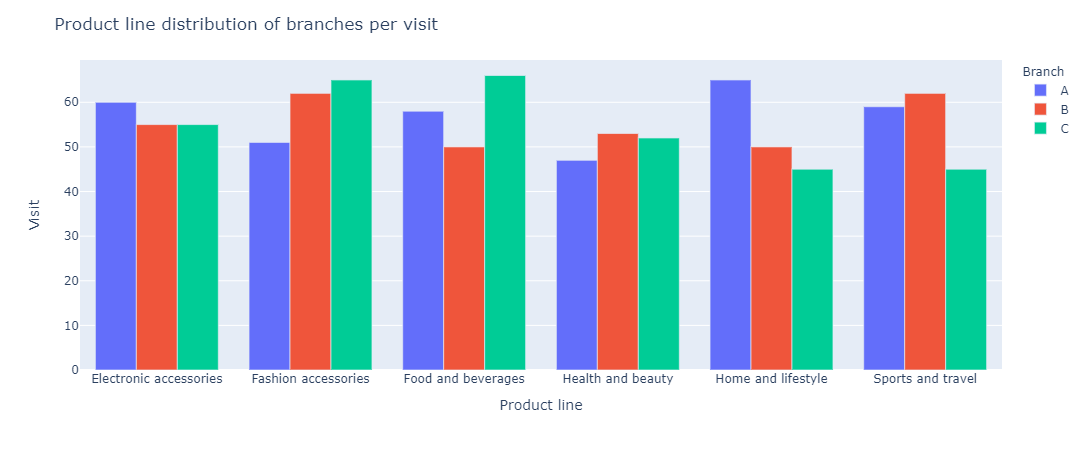

In [9]:
customer_per_branch = data.filter(['Invoice ID','Branch','Product line'])
customer_per_branch = customer_per_branch.groupby(['Branch','Product line']).agg({'Invoice ID':'count'})
customer_per_branch.reset_index(level=[0,1],inplace=True)
fig = px.bar(x=customer_per_branch['Product line'], y=customer_per_branch['Invoice ID'], color=customer_per_branch['Branch'], barmode='group',
             labels={'x': 'Product line', 'y': 'Visit'})
fig.update_layout(title_text="Product line distribution of branches per visit",legend_title="Branch")
fig.show()

## Product line, weekly sales comparison 

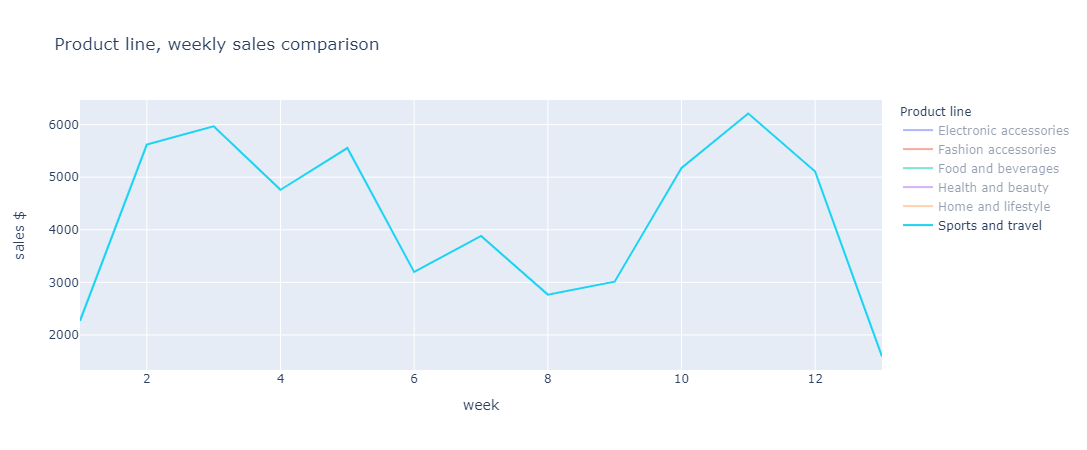

In [14]:
product_line = data.filter(['Invoice ID','Product line','sales $','day','month','week'])
product_line = pd.DataFrame(product_line.groupby(['Product line','week']).agg({'sales $':'sum'}))
product_line.reset_index(level=[0,1],inplace=True)
fig = px.line(product_line, x="week", y="sales $", color='Product line',title='Product line, weekly sales comparison')
fig.show()

### Observation
- X axis represent weeks.
- Y axis represent sales in dollars.
- Legend represent product line with different color.
- Electronic accessories shows the lowest sales in 10th week. It may be because products are not available in stores.
- Fashion accessories shows the lowest sales in 8th week because In branch-C spend per unit is very high so, customers avoid shopping till the discount or offer may apply on product.
- Food and beverages shows the lowest sales in 12th week because the unit price of product is quite high.
- Health and beauty shows the lowest sales in 2 week. It may be because lack of availability of products.
- Home and lifestyle is low in 8th week because unit price of product is high.
- Sports and travel shows the lowest sales in 8th week because in branch-C spend per unit is high and in branch-A spend per transaction is low, it may be because unavailability of the product.

## Visit spend per transaction, unit per transaction and spend per unit

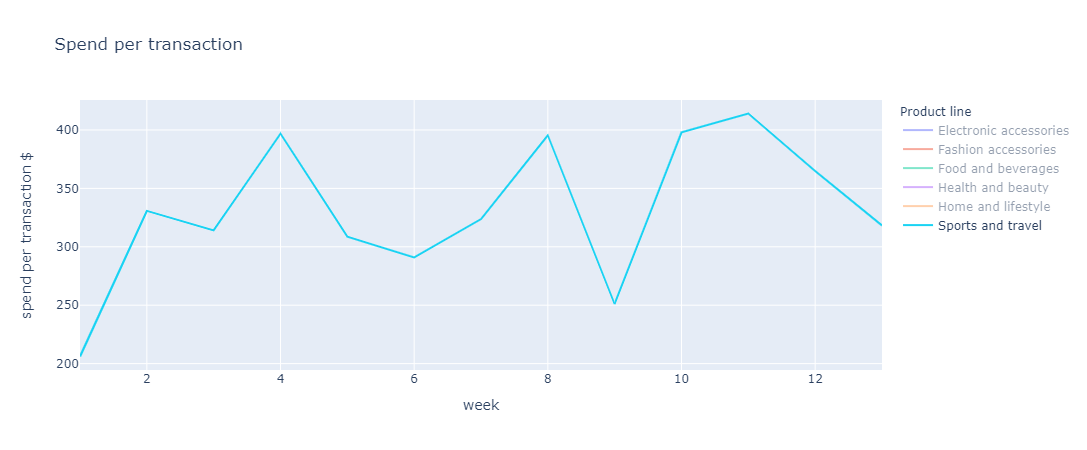

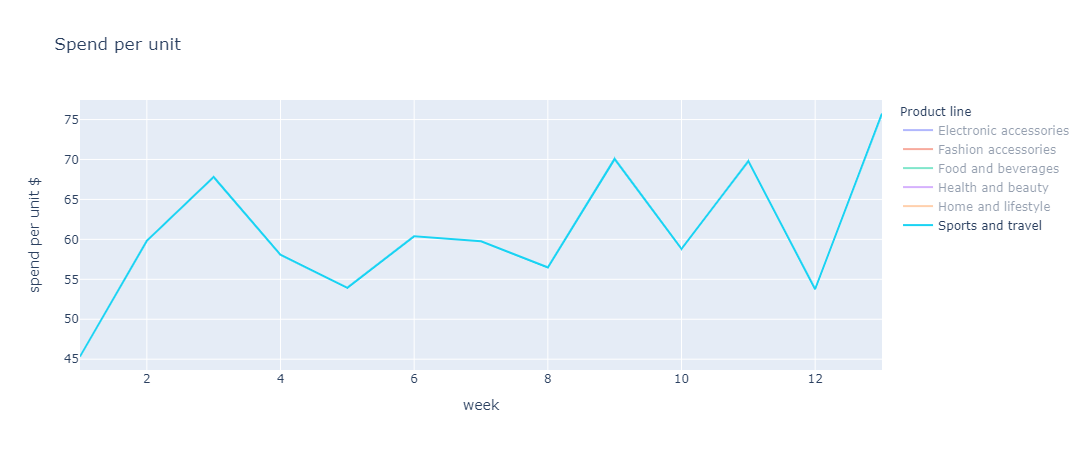

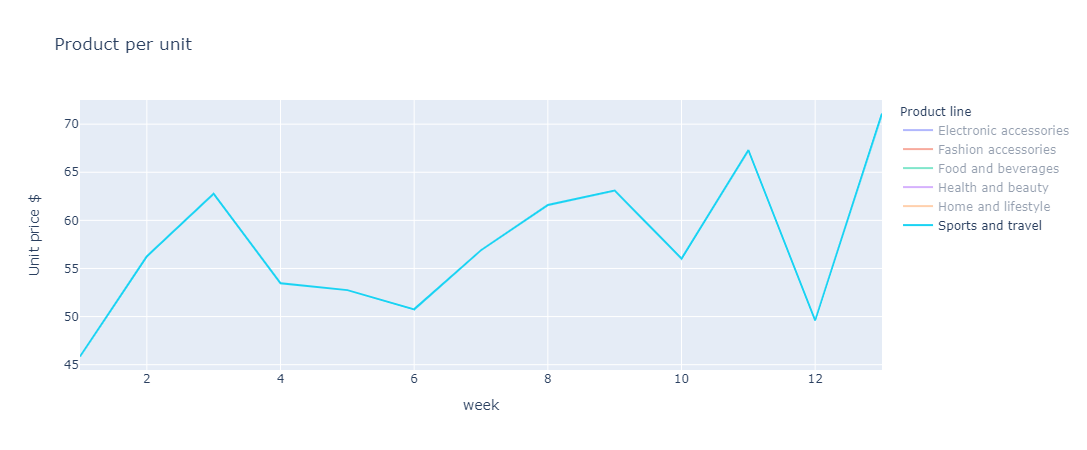

In [10]:
kpi = data.filter(['Invoice ID','Product line','sales $','Quantity','Parts of day','gross income','week','Unit price'])
kpi = pd.DataFrame(kpi.groupby(['Product line','week']).agg({'Unit price':'mean','Invoice ID':'count','sales $':'sum','Quantity':'sum'}))
kpi.reset_index(level=[0,1],inplace=True)
kpi['spend per transaction'] = kpi['sales $'] / kpi['Invoice ID']
kpi['unit per transaction'] = kpi['Quantity'] / kpi['Invoice ID']
kpi['spend per unit'] = kpi['sales $'] / kpi['Quantity']
kpi.rename(columns={'Invoice ID':'visits'},inplace=True)
fig = px.line(kpi, x="week", y="spend per transaction", color='Product line',title='Spend per transaction')
fig.update_layout(yaxis_title="spend per transaction $")
fig.show()
fig = px.line(kpi, x="week", y="spend per unit", color='Product line',title='Spend per unit')
fig.update_layout(yaxis_title="spend per unit $")
fig.show()
fig = px.line(kpi, x="week", y="Unit price", color='Product line',title='Product per unit')
fig.update_layout(yaxis_title="Unit price $")
fig.show()

## Weekly sales of product line per branch

In [16]:
def sales(df):
    df = df.filter(['Invoice ID','Branch','Product line','sales $','week'])
    df = pd.DataFrame(df.groupby(['Branch','Product line','week']).agg({'sales $':'sum'}))
    df.reset_index(level=[0,1,2],inplace=True)
    return df

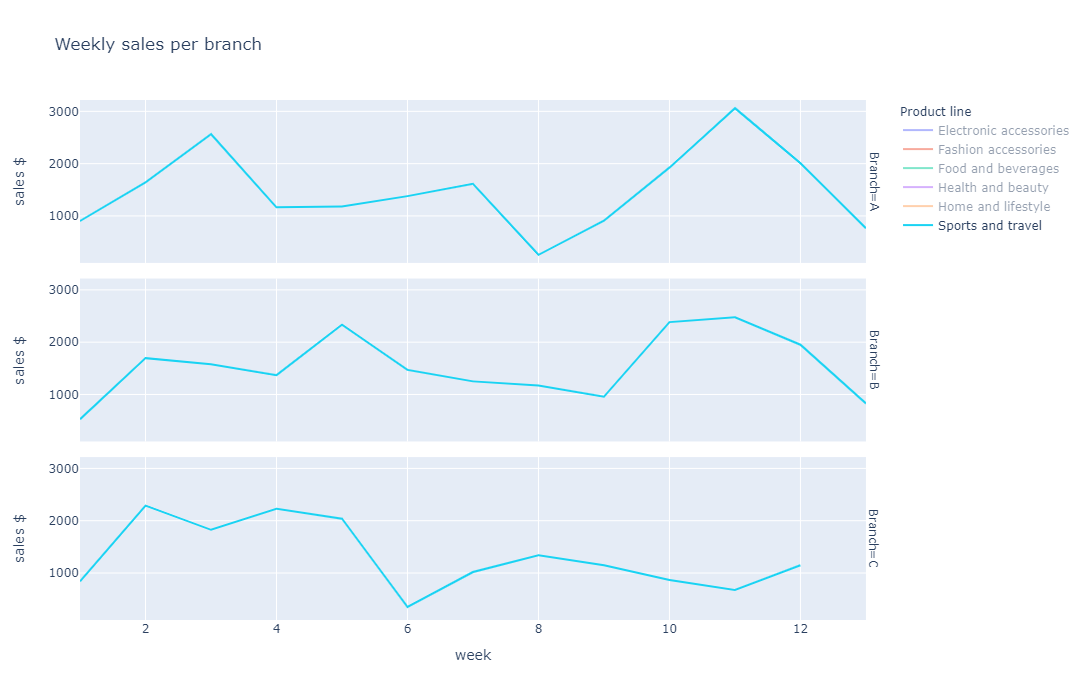

In [17]:
branch_A = sales(data)
# branch_A = branch_A[branch_A.Branch == 'A']
fig = px.line(branch_A, x="week", y="sales $", color='Product line',facet_row='Branch',height=700,title='Weekly sales per branch')
fig.show()

### Observation
- X axis represent weeks.
- Y axis represent sales in dollars.
- legend represent product line with different colors.
- Electronic accessories performance in branch-A is not good on comparing with other branches.
- Fashion accessories sales are lowest in week 7 because spend per unit is high.
- Food and beverages shows the lowest sales in week 2. It may be because of unavailability of the products.
- Health and beauty is the lowest in week 3 because spend per unit is high so customers wait for the discount or offer.
- Home and lifestyle acheived maximum sales at week 3 in all six product line but in 2 consecutive week sales is very low.
- Sports and travel shows the lowest sales in week 8.

## Spend per transaction, Unit per transaction and Spend per unit on branch level

In [12]:
def key_performance(branch_kpi):
    branch_kpi = data.filter(['Invoice ID','Branch','Product line','sales $','Quantity','week','Unit price'])
    branch_kpi = branch_kpi.groupby(['Branch','Product line','week']).agg({'Invoice ID':'count','sales $':'sum','Quantity':'sum','Unit price':'mean'})
    branch_kpi.reset_index(level=[0,1,2],inplace=True)
    branch_kpi['spend per transaction'] = branch_kpi['sales $'] / branch_kpi['Invoice ID']
    branch_kpi['unit per transaction'] = branch_kpi['Quantity'] / branch_kpi['Invoice ID']
    branch_kpi['spend per unit'] = branch_kpi['sales $'] / branch_kpi['Quantity']
    branch_kpi.rename(columns={'Invoice ID':'visits'},inplace=True)
    return branch_kpi

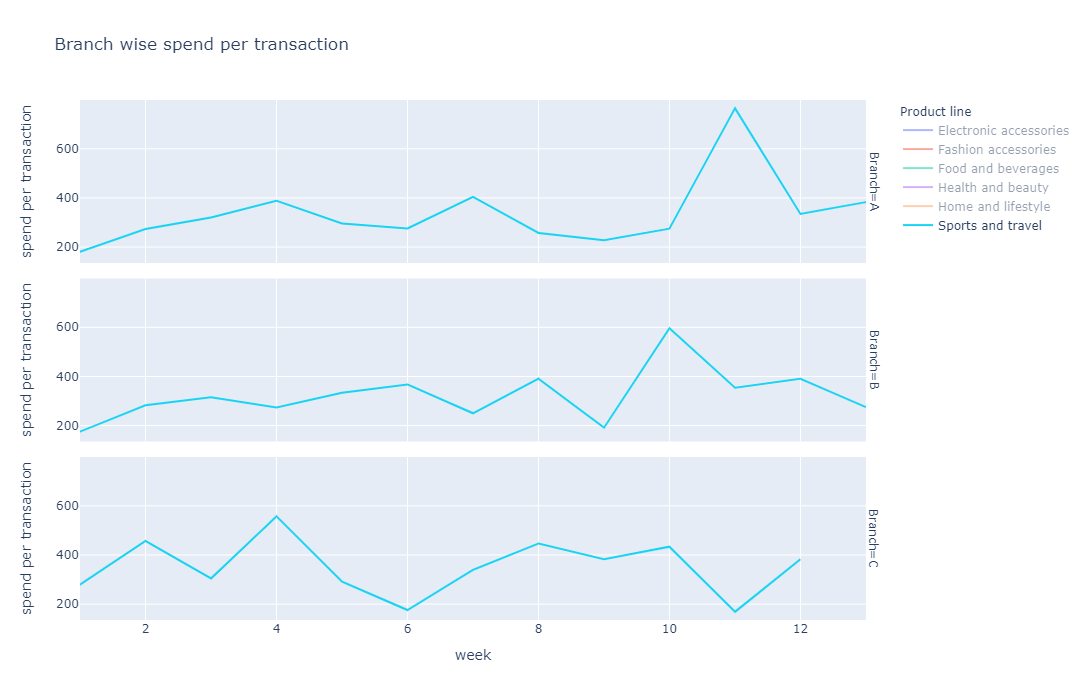

In [13]:
branch_A_kpi = key_performance(data)
# branch_A_kpi = branch_A_kpi[branch_A_kpi.Branch == 'A']
fig = px.line(branch_A_kpi, x="week", y="spend per transaction", color='Product line'
              ,facet_row='Branch',height=700,
              title='Branch wise spend per transaction')
# fig.update_layout(yaxis_title="spend per transaction $")
fig.show()

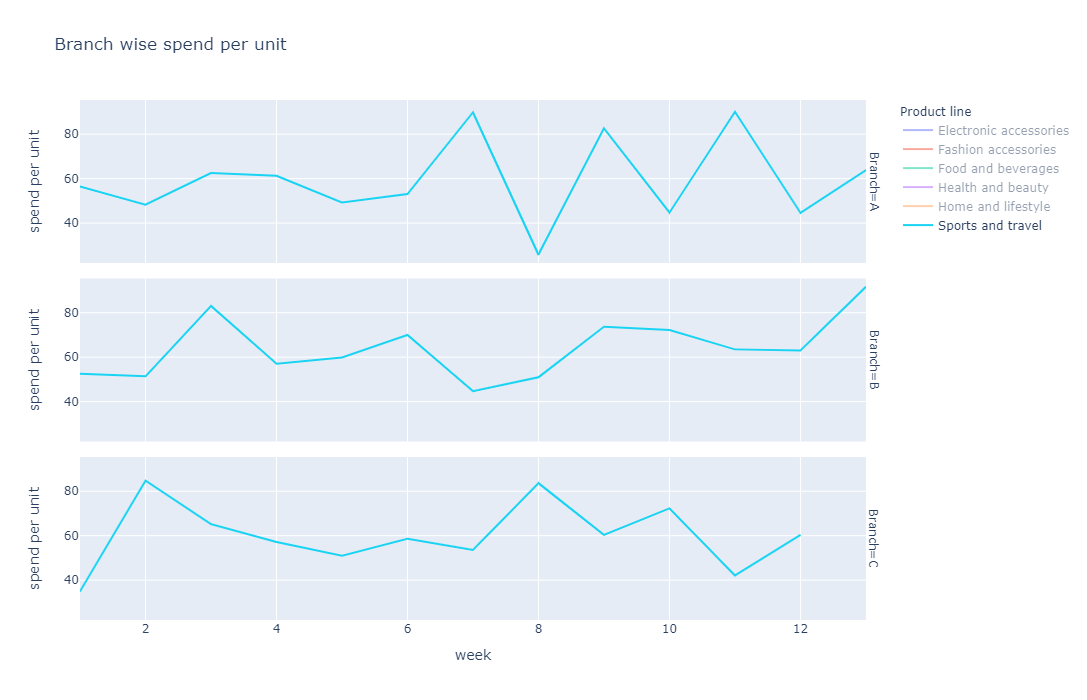

In [14]:
fig = px.line(branch_A_kpi, x="week", y="spend per unit", color='Product line',
              facet_row='Branch',height=700,title='Branch wise spend per unit')
# fig.update_layout(yaxis_title="spend per unit $")
fig.show()

## Product line sales via time
- 10:00 to 11:59 Morning
- 12:00 to 4:59 Afternoon
- 5:00 to 9:00 Evening

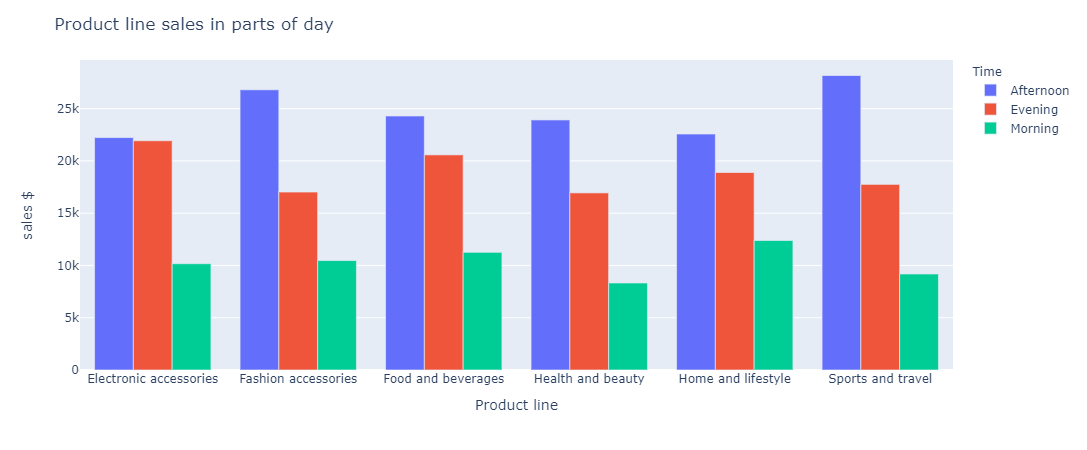

In [21]:
sales_time = data.filter(['Invoice ID','Product line','sales $','week','Parts of day'])
sales_time = pd.DataFrame(sales_time.groupby(['Product line','Parts of day']).agg({'sales $':'sum'}))
sales_time.reset_index(level=[0,1],inplace=True)
fig = px.bar(x=sales_time['Product line'], y=sales_time['sales $'], color=sales_time['Parts of day'], barmode='group',
             labels={'x': 'Product line', 'y': 'sales $'})
fig.update_layout(title_text="Product line sales in parts of day",legend_title="Time")
fig.show()

### Observation
- The sales in the morning are comparatively less because morning period is only 2 hours.
- The sales in the afternoon are high because the afternoon period is for 6 hours.

## Basket, sales and quantity per product line.

In [22]:
df1 = data.filter(['Invoice ID','Product line','Quantity','sales $'])
df1 = pd.DataFrame(df1.groupby(['Product line']).agg({'Invoice ID':'count','sales $':'sum','Quantity':'sum'}))
df1.reset_index(level=[0],inplace=True)
df1.rename(columns={'Invoice ID':'visit'},inplace=True)
df1

Product line  visit     sales $  Quantity
0  Electronic accessories    170  54337.5315       971
1     Fashion accessories    178  54305.8950       902
2      Food and beverages    174  56144.8440       952
3       Health and beauty    152  49193.7390       854
4      Home and lifestyle    160  53861.9130       911
5       Sports and travel    166  55122.8265       920

## In which part of day visits are most?

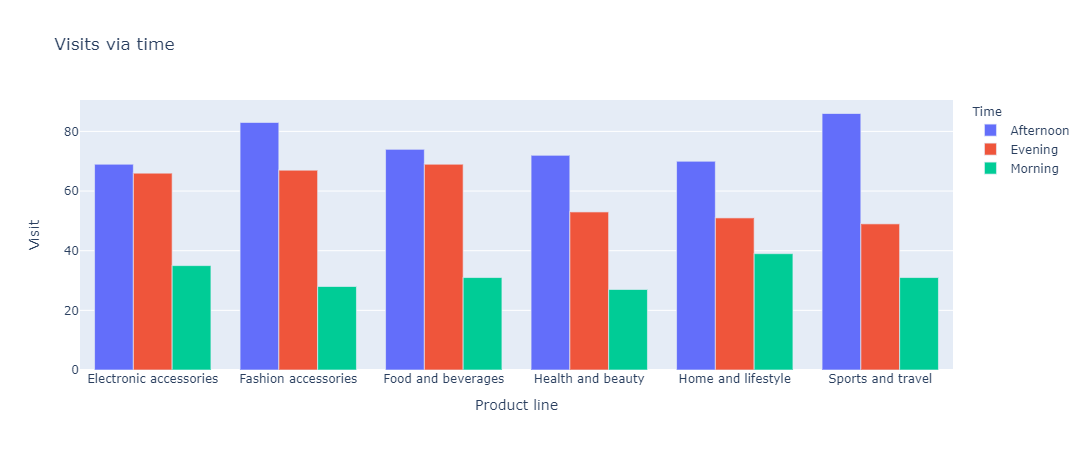

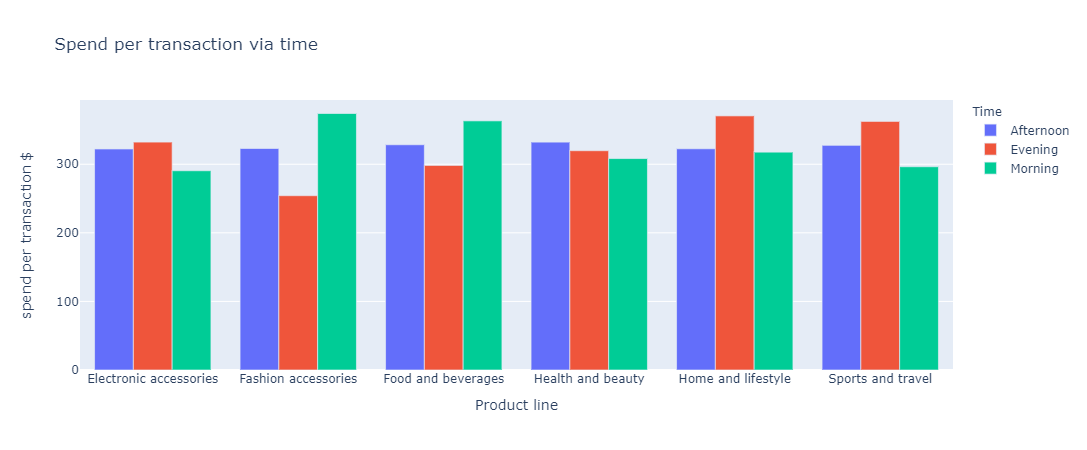

In [15]:
sales_time = data.filter(['Invoice ID','Product line','sales $','week','Parts of day','Quantity'])
sales_time = pd.DataFrame(sales_time.groupby(['Product line','Parts of day']).agg({'sales $':'sum','Invoice ID':'count'}))
sales_time.reset_index(level=[0,1],inplace=True)
sales_time['spend per transaction'] = sales_time['sales $'] / sales_time['Invoice ID']
fig = px.bar(x=sales_time['Product line'], y=sales_time['Invoice ID'], color=sales_time['Parts of day'], barmode='group',
             labels={'x': 'Product line', 'y': 'Visit'},title='Visits via time')
fig.update_layout(legend_title="Time")
fig.show()
fig = px.bar(x=sales_time['Product line'], y=sales_time['spend per transaction'], color=sales_time['Parts of day'], barmode='group',
             labels={'x': 'Product line', 'y': 'spend per transaction $'},title='Spend per transaction via time')
fig.update_layout(legend_title="Time")
fig.show()

## Visits per week in a part of day.

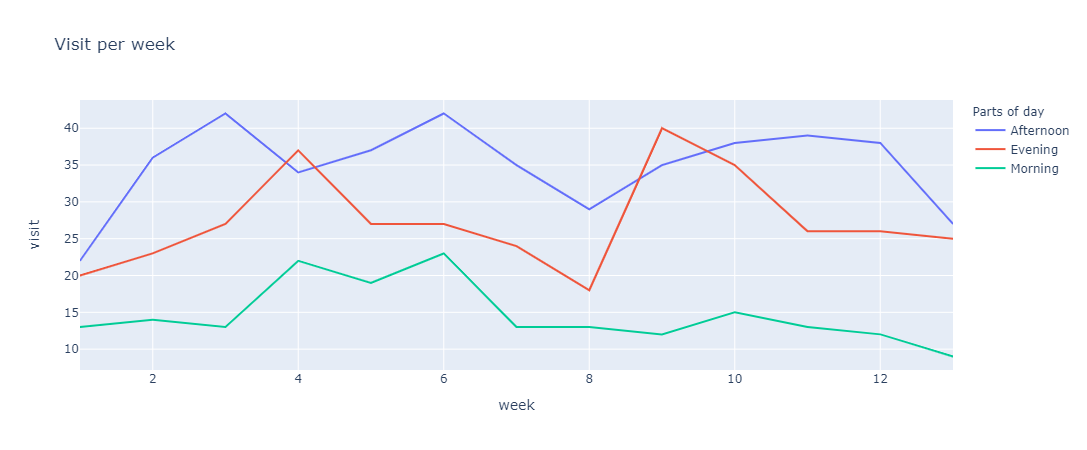

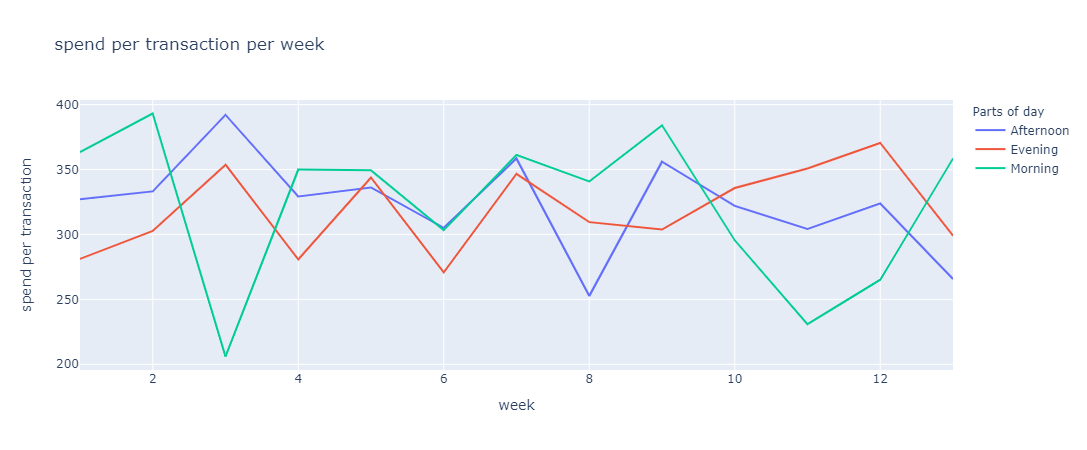

In [16]:
visit_week = data.filter(['Invoice ID','week','Parts of day','sales $'])
visit_week = pd.DataFrame(visit_week.groupby(['week','Parts of day']).agg({'Invoice ID':'count','sales $':'sum'}))
visit_week['spend per transaction'] = visit_week['sales $'] / visit_week['Invoice ID']
visit_week.reset_index(level=[0,1],inplace=True)
visit_week.rename(columns={'Invoice ID':'visit'},inplace=True)
fig = px.line(visit_week, x="week", y="visit", color='Parts of day',title='Visit per week')
fig.show()
fig = px.line(visit_week, x="week", y="spend per transaction", color='Parts of day',title='spend per transaction per week')
fig.show()

## Sales comparison between weekdays and weekends

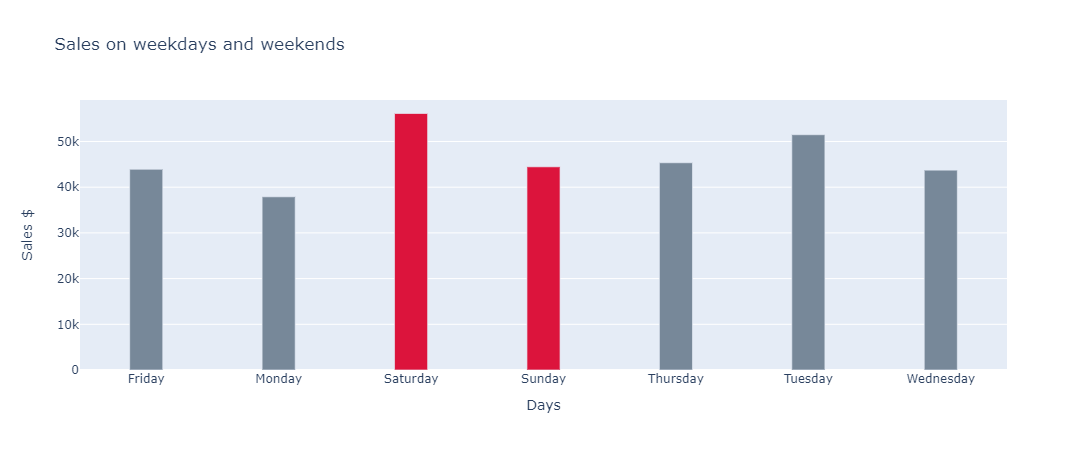

In [25]:
compare = data.filter(['Invoice ID','Product line','sales $','week','day'])
compare = pd.DataFrame(compare.groupby(['day']).agg({'sales $':'sum'}))
compare.reset_index(level=[0],inplace=True)
colors = ['lightslategray',] *7
colors[2] = 'crimson'
colors[3] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=compare['day'],
    y=compare['sales $'],
    marker_color=colors, width= 0.25
)])
fig.update_layout(title_text='Sales on weekdays and weekends',xaxis_title='Days',yaxis_title='Sales $')

## Sales comparison between weekdays and weekends on branch level

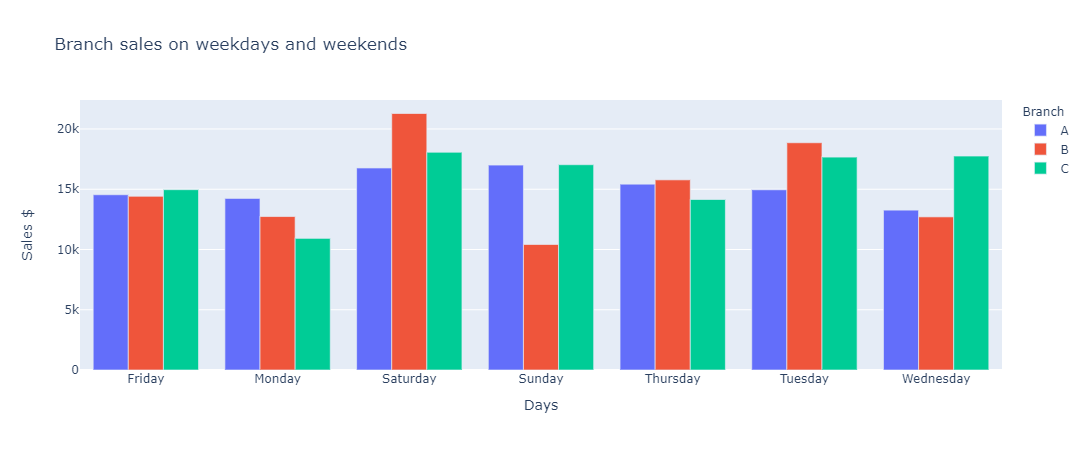

In [26]:
compare_2 = data.filter(['Branch','Product line','sales $','day'])
compare_2 = pd.DataFrame(compare_2.groupby(['Branch','day']).agg({'sales $':'sum'}))
compare_2.reset_index(level=[0,1],inplace=True)
# compare_2.sort_values(by=['day'],inplace=True)
compare_2.head()
# fig = px.line(compare_2, x="day", y="sales $", color='Branch',title='Branch sales on weekdays and weekends')
# fig.update_layout(yaxis_title="sales $")
# fig.show()
fig = px.bar(x=compare_2['day'], y=compare_2['sales $'], color=compare_2['Branch'], barmode='group',
             labels={'x': 'Days', 'y': 'Sales $'},title='Branch sales on weekdays and weekends')
fig.update_layout(legend_title="Branch")
fig.show()

## Weekly gross income

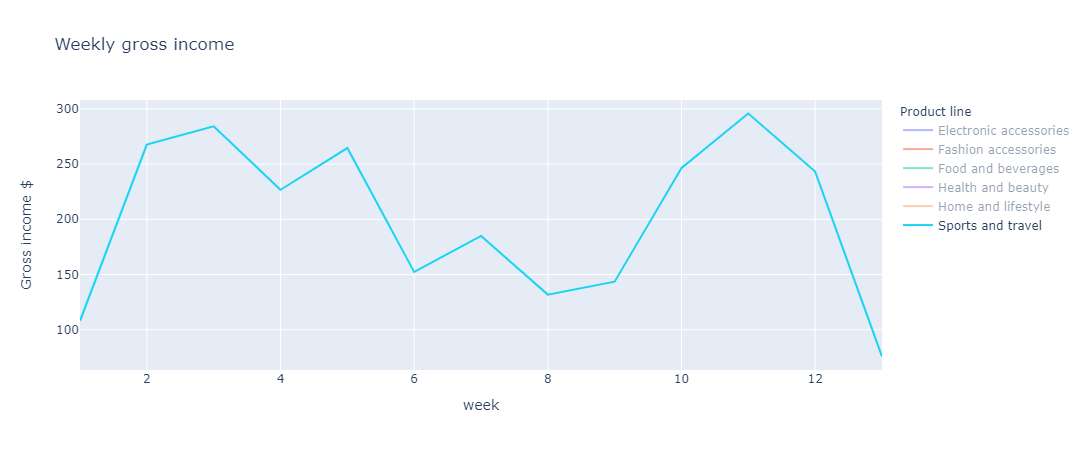

In [27]:
profit = data.filter(['Invoice ID','Product line','gross income','week'])
profit = pd.DataFrame(profit.groupby(['week','Product line']).agg({'gross income':'sum'}))
profit.reset_index(level=[0,1],inplace=True)
fig = px.line(profit, x="week", y="gross income", color='Product line',title='Weekly gross income')
fig.update_layout(yaxis_title="Gross income $")
fig.show()

## Is there any benefit to become a member?

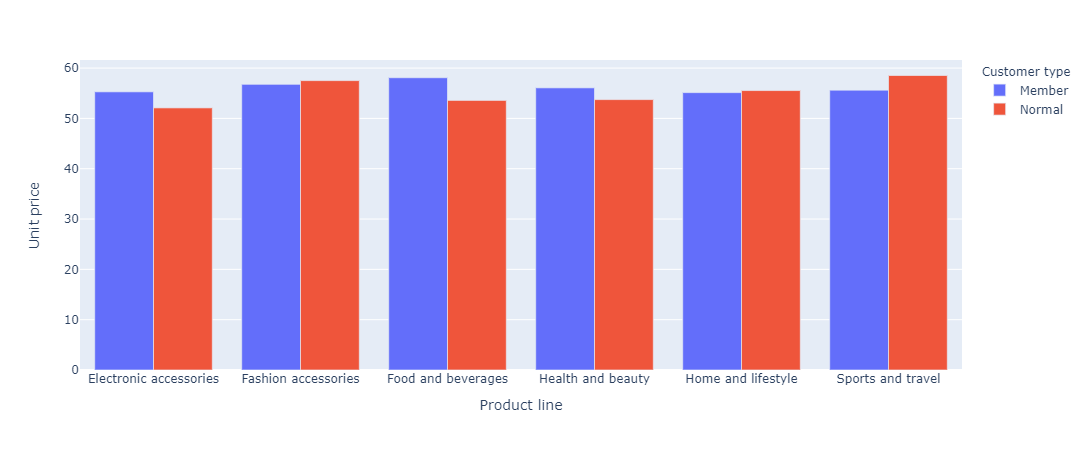

In [28]:
member = data.filter(['Invoice ID','Branch','Customer type','Product line','Unit price','Quantity'])
# member = member[member['Product line']=='Electronic accessories']
# member = member[member.Branch == 'C']
member = pd.DataFrame(member.groupby(['Customer type','Product line']).agg({'Unit price':'mean'}))
member.reset_index(level=[0,1],inplace=True)
fig = px.bar(x=member['Product line'], y=member['Unit price'], color=member['Customer type'],barmode='group',
             labels={'x': 'Product line', 'y': 'Unit price'})
fig.update_layout(legend_title="Customer type")
fig.show()

### Observation
- X axis represent product line
- Y axis represent unit price of product
- Legend represent customer type.
- Benefit of membership shows in fashion accessories, home and lifestyle and sports and travel

## shopping experience

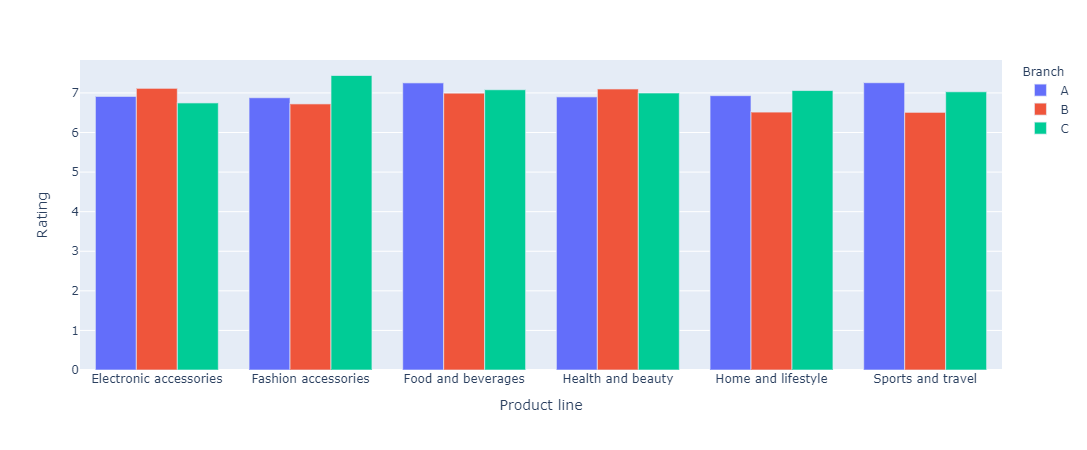

In [29]:
rating_branch = data.filter(['Branch','Rating','Product line'])
rating_branch = pd.DataFrame(rating_branch.groupby(['Branch','Product line']).Rating.mean())
rating_branch.reset_index(level=[0,1],inplace=True)
fig = px.bar(x=rating_branch['Product line'], y=rating_branch['Rating'], color=rating_branch['Branch'], barmode='group',
             labels={'x': 'Product line', 'y': 'Rating'})
fig.update_layout(legend_title="Branch")
fig.show()

### Observation
- X axis represent product line
- Y axis represent average rating
- Average rating of product falls around 7 but in branch-B home and lifestyle and sports and travel rating is 6.5 which means we have to focus on these two products in branch-B.

In [30]:
def bins(x):
    if x['date only'] <= 5:
        return 'bin 1'
    elif 6 <= x['date only'] <= 10:
        return 'bin 2'
    elif 11 <= x['date only'] <= 15:
        return 'bin 3'
    elif 16 <= x['date only'] <= 20:
        return 'bin 4'
    elif 21 <= x['date only'] <= 25:
        return 'bin 5'
    elif 26 <= x['date only'] <= 30:
        return 'bin 6'

In [31]:
# df2 = data.filter(['week','day','date only','month','sales $'])
# df2['bins'] = df2.apply(bins,axis=1)
# df2

df2 = data.filter(['Invoice ID','Product line','sales $','Quantity','week','day','date only','month','Unit price'])
df2['bins'] = df2.apply(bins,axis=1)
df2 = pd.DataFrame(df2.groupby(['Product line','week','bins']).agg({'Unit price':'mean','Invoice ID':'count','sales $':'sum','Quantity':'sum'}))
df2.reset_index(level=[0,1,2],inplace=True)
df2['spend per transaction'] = df2['sales $'] / df2['Invoice ID']
df2['unit per transaction'] = df2['Quantity'] / df2['Invoice ID']
df2['spend per unit'] = df2['sales $'] / df2['Quantity']
# df2['bins'] = df2.apply(bins,axis=1)
df2.rename(columns={'Invoice ID':'visits'},inplace=True)
df2

Product line  week   bins  Unit price  visits    sales $  \
0    Electronic accessories     1  bin 1   66.694286       7  2917.0470   
1    Electronic accessories     2  bin 2   65.413333       6  1946.9415   
2    Electronic accessories     2  bin 3   61.335000       4  2285.2620   
3    Electronic accessories     3  bin 3   59.732000       5  2434.2675   
4    Electronic accessories     3  bin 4   31.874000       5   846.3315   
..                      ...   ...    ...         ...     ...        ...   
154       Sports and travel    11  bin 4   62.654000       5  2199.6765   
155       Sports and travel    12  bin 4   52.735000       6  2710.8375   
156       Sports and travel    12  bin 5   47.243750       8  2396.3100   
157       Sports and travel    13  bin 5   93.310000       1   195.9510   
158       Sports and travel    13  bin 6   65.555000       4  1394.8935   

     Quantity  spend per transaction  unit per transaction  spend per unit  
0          41             416.721000              5.857143       71.147488  
1          27             324.490250              4.500000       72.108944  
2          34             571.315500              8.500000       67.213588  
3          40             486.853500              8.000000       60.856687  
4          26             169.266300              5.200000       32.551212  
..        ...                    ...                   ...             ...  
154        35             439.935300              7.000000       62.847900  
155        46             451.806250              7.666667       58.931250  
156        49             299.538750              6.125000       48.904286  
157         2             195.951000              2.000000       97.975500  
158        19             348.723375              4.750000       73.415447  

[159 rows x 10 columns]